In [4]:
!wget https://drive.google.com/file/d/12T5tqdOKWMAQfc8NkUds5aNKZKwmpjCB/view?usp=sharing

--2022-04-13 04:30:58--  https://drive.google.com/file/d/12T5tqdOKWMAQfc8NkUds5aNKZKwmpjCB/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 173.194.213.138, 173.194.213.101, 173.194.213.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.213.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  64.60K  --.-KB/s    in 0.002s  

2022-04-13 04:30:59 (25.5 MB/s) - ‘view?usp=sharing’ saved [66146]



In [5]:
!ls


 sample_data  'view?usp=sharing'


In [6]:
!unzip covid-19

unzip:  cannot find or open covid-19, covid-19.zip or covid-19.ZIP.


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
TRAIN_PATH = "drive/MyDrive/Covid-19/Train"
VAL_PATH = "drive/MyDrive/Covid-19/Val"

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [10]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [12]:
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2,horizontal_flip = True,)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory('drive/MyDrive/Covid-19/Train',target_size = (224,224),batch_size = 32, class_mode = 'binary')

Found 7000 images belonging to 2 classes.


In [14]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [15]:
validation_generator = test_dataset.flow_from_directory('drive/MyDrive/Covid-19/Val',target_size = (224,224),batch_size = 32,class_mode = 'binary')

Found 3000 images belonging to 2 classes.


In [16]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
8/8 [==============================] - 174s 22s/step - loss: 0.9839 - accuracy: 0.6719 - val_loss: 0.6799 - val_accuracy: 0.6094
Epoch 2/10
8/8 [==============================] - 92s 11s/step - loss: 0.6251 - accuracy: 0.7188 - val_loss: 0.5948 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 91s 11s/step - loss: 0.6532 - accuracy: 0.7344 - val_loss: 0.6589 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 92s 11s/step - loss: 0.5643 - accuracy: 0.7656 - val_loss: 0.6764 - val_accuracy: 0.6094
Epoch 5/10
8/8 [==============================] - 90s 11s/step - loss: 0.5819 - accuracy: 0.7461 - val_loss: 0.5470 - val_accuracy: 0.7969
Epoch 6/10
8/8 [==============================] - 87s 11s/step - loss: 0.5996 - accuracy: 0.6992 - val_loss: 0.5875 - val_accuracy: 0.7188
Epoch 7/10
8/8 [==============================] - 89s 11s/step - loss: 0.6393 - accuracy: 0.6602 - val_loss: 0.6179 - val_accuracy: 0.7031
Epoch 8/10
8/8 [==========

In [17]:
print(model.layers[0].weights)

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[ 0.05018714, -0.04111976,  0.12810548, -0.10068788,
          -0.03985051, -0.02826978,  0.00287174, -0.0881154 ,
          -0.0829858 , -0.05261596,  0.13340783,  0.10882005,
          -0.11483789, -0.09731973, -0.14359671,  0.11911346,
           0.06737395, -0.08179034,  0.15000917, -0.13163261,
          -0.08886214, -0.02432266, -0.11091176, -0.1319238 ,
           0.00241402,  0.02379453, -0.01651067, -0.07284486,
          -0.13929358, -0.05430029, -0.06193407,  0.02283797],
         [-0.00092343,  0.11700733,  0.0491698 , -0.06819045,
           0.06399449,  0.12173916, -0.00981868,  0.12534772,
           0.11484803,  0.05809854,  0.135728  , -0.04942789,
          -0.03873836,  0.05931445, -0.11941642,  0.01456387,
           0.10270698, -0.13029884, -0.09048373,  0.02551965,
          -0.13571139, -0.09571268,  0.00078857,  0.12339392,
          -0.05653621,  0.09269664, -0.13849346,  0.06334

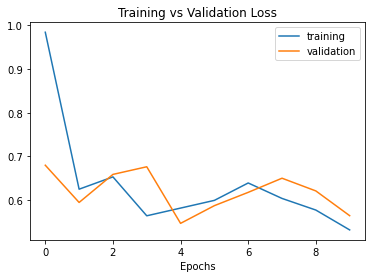

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
model.save("model1.h5")